# demo notebook for rfft N1 calcs

## We can get the N1 matrix as well for basically the same cost

By definition the n1 matrix is such that $N^{(1)}_L = N^{(1)}_{LL'}C^{\phi\phi}_{L'}$



In [1]:
import numpy as np
import pylab as pl
import lensitbiases as lb
from lensitbiases import n0_fft, n1_fft, utils_n1
from scipy.interpolate import UnivariateSpline as spl

%matplotlib inline

cls_unl, cls_len, cls_grad = lb.get_default_cls() # default CMB cls (put here the one you are using)

(-0.025, 0.05)

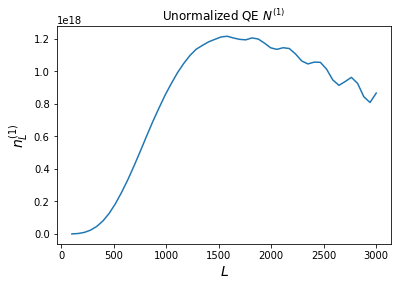

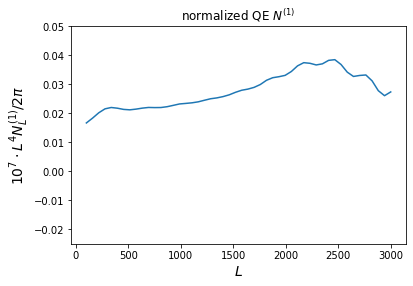

In [2]:
# S4 polarization N1:

# N1 depends on the relation between the filtered and CMB maps (fal matrix):
fal = utils_n1.get_fal(clscmb_filt=cls_len, clscmb_dat=cls_len, 
                       lmin_ivf=30, lmax_ivf=3000, nlevt=1.5, nlevp=1.5 * np.sqrt(2.), beam=3., jt_tp=False)[1]
fal['tt'] *= 0 # using polarization only
if 'te' in fal.keys(): fal['te'] *= 0.


# Building (unnormalized estimate) N1 on a grid of 50 points
lib_n1 = n1_fft.n1_fft(fal, cls_len, cls_grad, cls_unl['pp'], lminbox=50, lmaxbox=4000) 
Ls_n1 = np.linspace(100, 3000, 50)
n1_s4like = np.array([lib_n1.get_n1('p_p', L, do_n1mat=False) for L in Ls_n1])

pl.plot(Ls_n1, n1_s4like)
pl.xlabel(r'$L$', fontsize=14)
pl.ylabel(r'$n_L^{(1)}$', fontsize=14)
pl.title(r'Unormalized QE $N^{(1)}$')


# the normalization should be the same as the one used in ones' analysis. Here's one way to get it with this package
(R_gg, R_cc), Ls_r = n0_fft.nhl_fft(fal, cls_grad, lminbox=50, lmaxbox=6000).get_nhl('p_p')  # gradient and curl responses, and multipoles

pl.figure()
pl.plot(Ls_n1, Ls_n1 ** 2 * (Ls_n1 + 1) ** 2 * n1_s4like / spl(Ls_r, R_gg, k=2, s=0, ext='zeros')(Ls_n1) ** 2 * 1e7 / 2. / np.pi)
pl.xlabel(r'$L$', fontsize=14)
pl.ylabel(r'$10^7\cdot L^4 N_L^{(1)} /2\pi$', fontsize=14)
pl.title(r'normalized QE $N^{(1)}$')
pl.ylim(-0.025, 0.05)

# We can get the N1 matrix as well for basically the same cost

By definition the n1 matrix is such that $N^{(1)}_L = N^{(1)}_{LL'}C^{\phi\phi}_{L'}$



In [3]:
n1_mat = np.array([lib_n1.get_n1('p_p', L, do_n1mat=True)[1] for L in Ls_n1])


Text(0.5, 1.0, 'most contribution to N1 comes from $ L^p < L$')

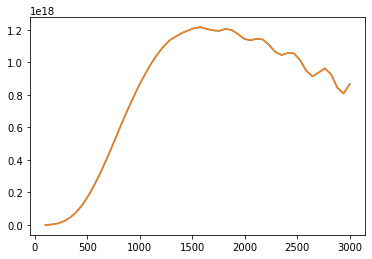

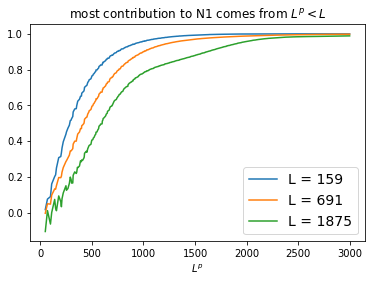

In [4]:
# Checking we get indeed N1 by summing against Cpp:
pl.plot(Ls_n1, np.dot(n1_mat, cls_unl['pp'][:n1_mat.shape[1]]))
pl.plot(Ls_n1, n1_s4like)

# Checking contributions to N1 as function of L'
pl.figure()
ls, = np.where(lib_n1.box.mode_counts()[:3000] > 1)
for iL in [1, 10, 30]:
    pl.plot(ls, np.cumsum(n1_mat[iL, ls] *cls_unl['pp'][ls])/n1_s4like[iL], label='L = ' + str(int(Ls_n1[iL])))
pl.legend(fontsize=14)
pl.xlabel(r'$L^p$')
pl.title(r'most contribution to N1 comes from $ L^p < L$')